In [1]:
import pandas as pd
import sys
import os
import json
from datetime import datetime

# Add src to path to import local modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import your custom modules
from utils import ResourceTracker, set_global_seed, ExperimentLogger
from nlp_models import (
    load_zero_shot_pipeline, 
    extract_context_sentences, 
    classify_sentences_batch, 
    get_hf_model_metadata,
    get_accompanying_terms
)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from ast import literal_eval

# Initialize Logging and Seeding
logger = ExperimentLogger(log_dir="../reports")
set_global_seed(42)

Logging experiments to: ../reports/experiment_20260113_212135.json
Global seed set to: 42


# 1. Top 15 Mentioned Countries

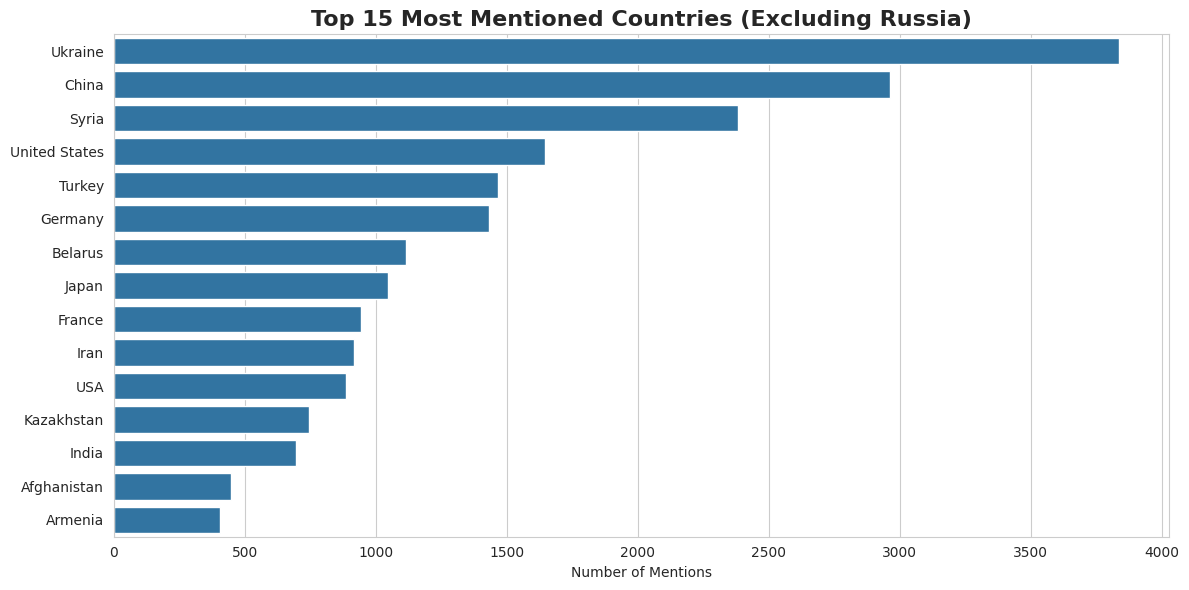

In [2]:
# Load the dataset
data_path = "../data/processed/country_counts.csv"
df_countries = pd.read_csv(data_path)
plt.figure(figsize=(12, 6))
top_15 = df_countries[df_countries['extracted_countries'] != 'Russia'].nlargest(15, 'count')
top_15.columns = ['Country', 'Mentions']

sns.barplot(data=top_15, x="Mentions", y="Country")
plt.title('Top 15 Most Mentioned Countries (Excluding Russia)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Mentions')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Mentions Over Time

/tmp/ipykernel_29419/389604273.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  timeline = df_time.groupby(['extracted_countries', pd.Grouper(key='date', freq='Y')]).size().reset_index(name='Counts')


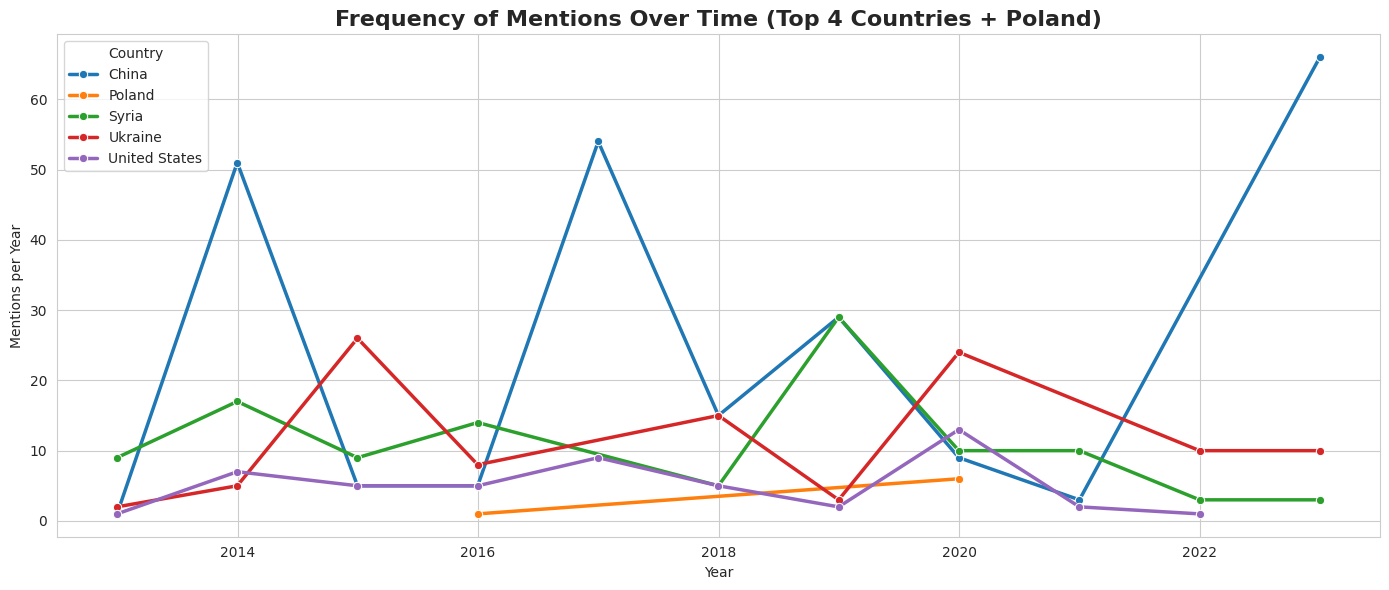

In [9]:
# Load the dataset
data_path = "../data/processed/putins_talks_with_countries.csv"
df = pd.read_csv(data_path, parse_dates=['date'])
df_exploded['extracted_countries'] = df['extracted_countries'].apply(literal_eval).explode('extracted_countries').dropna().reset_index(drop=True)
    
# Filter for only our top 5 countries
top_countries = ['Ukraine', 'United States', 'China', 'Poland', 'Syria']
df_time = df_exploded[df_exploded['extracted_countries'].isin(top_countries)].copy()

# Group by Year (or Month 'M') and Country
# Using 'Y' for smoother lines over a long period, switch to 'M' for granularity
timeline = df_time.groupby(['extracted_countries', pd.Grouper(key='date', freq='Y')]).size().reset_index(name='Counts')

plt.figure(figsize=(14, 6))
sns.lineplot(data=timeline, x="date", y="Counts", hue="extracted_countries", marker="o", linewidth=2.5)

plt.title('Frequency of Mentions Over Time (Top 4 Countries + Poland)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mentions per Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# 3. Word Cloud of Accompanying Terms


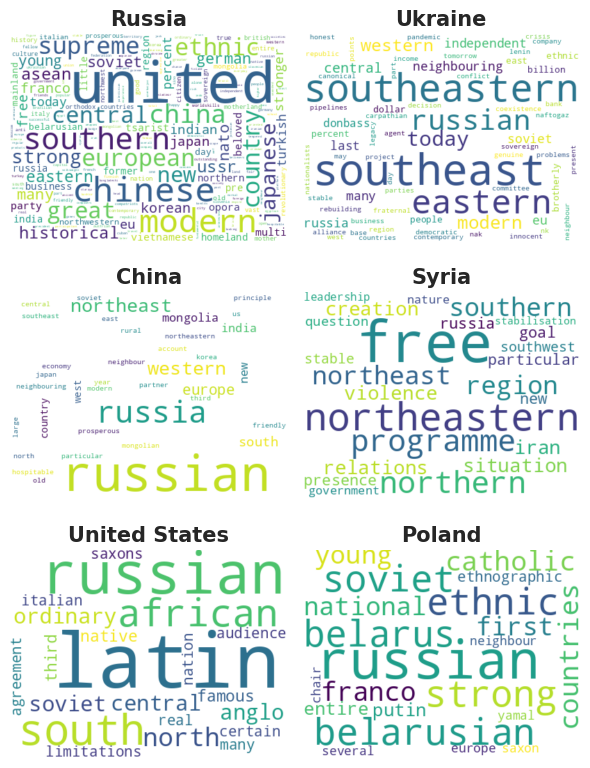

In [7]:
# Load the dataset
data_path = "../data/processed/country_accompanying_terms.csv"
df_terms = pd.read_csv(data_path)

fig, axes = plt.subplots(3, 2, figsize=(6, 8))
axes = axes.flatten()

top_countries = ['Russia', 'Ukraine', 'China', 'Syria', 'United States', 'Poland']

for i, country in enumerate(top_countries):
    terms_str = df_terms.loc[df_terms['country'] == country, 'accompanying_terms'].values
    if len(terms_str) > 0:
        terms = literal_eval(terms_str[0])
        text_cloud = " ".join(terms)
        wc = WordCloud(width=400, height=300, background_color='white', colormap='viridis', collocations=False).generate(text_cloud)
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(country, fontsize=15, fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, "No Terms Found", ha='center')
        axes[i].set_title(country, fontsize=10)
            
    axes[i].axis('off')
# plt.suptitle(f'Contextual Word Clouds: Terms Accompanying Top 5 Countries + Poland', fontsize=22, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()